# Accessing historical data from running race results


One of the great features in Runpandas is the capability of accessing race's result datasets accross several races around the world, from majors to local ones (if it's available at our data repository).  In this example, we will explore 


## Exploring the results and highlights from the 2022 Berlin Marathon

More than 30,000 people took the starting line for the 2022 Berlin Marathon, on 25 September 2022. An Elite Platinum Label Marathon, and one of the World marathon Majors. The race is quite famous for its fast and flat course, making it perfect for a record-setting day.

But this particular race also came with special flavours, with the participation of the top runners Eliud Kipchoge in the men's pro race and American record holder Keira D'Amato in the women's race.

In this notebook we will explore the results and highlights from the 2022 Berlin Marathon using runpandas methods specially tailored for handling race results data.

### Race Overview

First, let's load the Berlin Marathon data by using the runpandas method ``runpandas.get_events``. This function provides a way of accessing the race data and visualize the results from several marathons available at our datasets repository. Given the year and the marathon identifier you can filter any marathon datasets that you want analyze. The result will be a list of ``runpandas.EventData`` instances with race result and its metadata. Let's look for Berlin Marathon results.



In [1]:
import pandas as pd
import runpandas as rpd
import warnings
warnings.filterwarnings('ignore')

In [2]:
results = rpd.get_events('Berlin')
results

[<Event: name=Berlin Marathon Results from 2022., country=DE, edition=2022>]

The result comes with the Berlin Marathon Result from 2022. Let's take a look inside the race event, which comes with a handful method to describe its attributes and a special method to load the race result data into a `runpandas.datasets.schema.RaceData` instance.

In [3]:
berlin_result = results[0]
print('Event type', berlin_result.run_type)
print('Country', berlin_result.country)
print('Year', berlin_result.edition)
print('Name', berlin_result.summary)

Event type RunTypeEnum.MARATHON
Country DE
Year 2022
Name Berlin Marathon Results from 2022.



Now that we confirmed that we requested the corresponding marathon dataset. We will load it into a DataFrame so we can further explore it.

In [4]:
#loading the race data into a RaceData Dataframe
race_result = berlin_result.load()
race_result

,position,position_gender,country,sex,division,bib,firstname,lastname,club,starttime,...,10k,15k,20k,25k,30k,35k,40k,grosstime,nettime,category
0,1,1,KEN,M,1,1,Eliud,Kipchoge,–,09:15:00,...,0 days 00:28:23,0 days 00:42:33,0 days 00:56:45,0 days 01:11:08,0 days 01:25:40,0 days 01:40:10,0 days 01:54:53,0 days 02:01:09,0 days 02:01:09,M35
1,2,2,KEN,M,1,5,Mark,Korir,–,09:15:00,...,0 days 00:28:56,0 days 00:43:35,0 days 00:58:14,0 days 01:13:07,0 days 01:28:06,0 days 01:43:25,0 days 01:59:05,0 days 02:05:58,0 days 02:05:58,M30
2,3,3,ETH,M,1,8,Tadu,Abate,–,09:15:00,...,0 days 00:29:46,0 days 00:44:40,0 days 00:59:40,0 days 01:14:44,0 days 01:30:01,0 days 01:44:55,0 days 02:00:03,0 days 02:06:28,0 days 02:06:28,MH
3,4,4,ETH,M,2,26,Andamlak,Belihu,–,09:15:00,...,0 days 00:28:23,0 days 00:42:33,0 days 00:56:45,0 days 01:11:09,0 days 01:26:11,0 days 01:42:14,0 days 01:59:14,0 days 02:06:40,0 days 02:06:40,MH
4,5,5,KEN,M,3,25,Abel,Kipchumba,–,09:15:00,...,0 days 00:28:55,0 days 00:43:35,0 days 00:58:14,0 days 01:13:07,0 days 01:28:03,0 days 01:43:08,0 days 01:59:14,0 days 02:06:49,0 days 02:06:49,MH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35566,DNF,–,USA,M,–,65079,michael,perkowski,–,–,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,M65
35567,DNF,–,USA,M,–,62027,Karl,Mann,–,–,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,M55
35568,DNF,–,THA,F,–,27196,oraluck,pichaiwongse,STATE to BERLIN 2022,–,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,W55
35569,DNF,–,SUI,M,–,56544,Gerardo,GARCIA CALZADA,–,–,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,M50


Now you can get some insights about the Berlin Marathon 2022, by using its tailored methods for getting basic and quick insights. For example, the number of finishers, number of participants and the winner info.

In [5]:
print('Total participants', race_result.total_participants)
print('Total finishers', race_result.total_finishers)
print('Total Non-Finishers', race_result.total_nonfinishers)

Total participants 35571
Total finishers 34844
Total Non-Finishers 727


In [6]:
race_result.winner

position                         1
position_gender                  1
country                        KEN
sex                              M
division                         1
bib                              1
firstname                    Eliud
lastname                  Kipchoge
club                             –
starttime                 09:15:00
start_raw_time            09:15:00
half               0 days 00:59:51
5k                 0 days 00:14:14
10k                0 days 00:28:23
15k                0 days 00:42:33
20k                0 days 00:56:45
25k                0 days 01:11:08
30k                0 days 01:25:40
35k                0 days 01:40:10
40k                0 days 01:54:53
grosstime          0 days 02:01:09
nettime            0 days 02:01:09
category                       M35
Name: 0, dtype: object

Eliud Kipchoge of Kenya won the 2022 Berlin Marathon in 2:01:09. Kipchoge’s victory was his fourth in Berlin and 17th overall in a career of 19 marathon starts.  And who was the women's race winner?


In [7]:
race_result[(race_result['position_gender'] == 1) & (race_result['sex'] == 'F')].T

,32
position,33
position_gender,1
country,ETH
sex,F
division,1
bib,F24
firstname,Tigist
lastname,Assefa
club,–
starttime,09:15:00


Tigist Assefa of Ethiopia won the women’s race in a stunning time of 2:15:37 to set a new course record in Berlin. 

Runpandas also provides a race's summary method for showing the compilation of some general insights such as finishers, partipants (by gender and overall).

In [8]:
race_result.summary()

Event name                    berlin marathon
Event type                                42k
Event country                              DE
Event date                         25-09-2022
Number of participants                  35571
Number of finishers                     34844
Number of non-finishers                   727
Number of male finishers                23314
Number of female finishers              11523
Winner Nettime                0 days 02:01:09
dtype: object

### Final Results - The podium finishers


Now that we have access to all finishers data, we would like to see the podium (top 10) finishers for the men and women's race.  For anwesring this question, we will use Matplotlib, a Python library for creating from basic to advanced plots. Let's plot the final race time results for men and women.

In [9]:
import matplotlib.pyplot as plt

First, let's pick only the array of the top 10 finishers for men and women.

In [10]:
man_top_10 = race_result[(race_result['position_gender'].isin([1,2,3,4,5,6,7,8,9,10])) & (race_result['sex'] == 'M')]
man_top_10

,position,position_gender,country,sex,division,bib,firstname,lastname,club,starttime,...,10k,15k,20k,25k,30k,35k,40k,grosstime,nettime,category
0,1,1,KEN,M,1,1,Eliud,Kipchoge,–,09:15:00,...,0 days 00:28:23,0 days 00:42:33,0 days 00:56:45,0 days 01:11:08,0 days 01:25:40,0 days 01:40:10,0 days 01:54:53,0 days 02:01:09,0 days 02:01:09,M35
1,2,2,KEN,M,1,5,Mark,Korir,–,09:15:00,...,0 days 00:28:56,0 days 00:43:35,0 days 00:58:14,0 days 01:13:07,0 days 01:28:06,0 days 01:43:25,0 days 01:59:05,0 days 02:05:58,0 days 02:05:58,M30
2,3,3,ETH,M,1,8,Tadu,Abate,–,09:15:00,...,0 days 00:29:46,0 days 00:44:40,0 days 00:59:40,0 days 01:14:44,0 days 01:30:01,0 days 01:44:55,0 days 02:00:03,0 days 02:06:28,0 days 02:06:28,MH
3,4,4,ETH,M,2,26,Andamlak,Belihu,–,09:15:00,...,0 days 00:28:23,0 days 00:42:33,0 days 00:56:45,0 days 01:11:09,0 days 01:26:11,0 days 01:42:14,0 days 01:59:14,0 days 02:06:40,0 days 02:06:40,MH
4,5,5,KEN,M,3,25,Abel,Kipchumba,–,09:15:00,...,0 days 00:28:55,0 days 00:43:35,0 days 00:58:14,0 days 01:13:07,0 days 01:28:03,0 days 01:43:08,0 days 01:59:14,0 days 02:06:49,0 days 02:06:49,MH
5,6,6,ETH,M,2,12,Limenih,Getachew,–,09:15:00,...,0 days 00:29:46,0 days 00:44:40,0 days 00:59:42,0 days 01:14:45,0 days 01:30:00,0 days 01:45:06,0 days 02:00:22,0 days 02:07:07,0 days 02:07:07,M30
6,7,7,JPN,M,4,15,Kenya,Sonota,JR East Railway,09:15:00,...,0 days 00:29:46,0 days 00:44:38,0 days 00:59:39,0 days 01:14:45,0 days 01:30:01,0 days 01:45:06,0 days 02:00:30,0 days 02:07:14,0 days 02:07:14,MH
7,8,8,JPN,M,5,24,Tatsuya,Maruyama,Toyota,09:15:00,...,0 days 00:30:10,0 days 00:45:28,0 days 01:00:47,0 days 01:15:46,0 days 01:30:43,0 days 01:45:53,0 days 02:01:17,0 days 02:07:50,0 days 02:07:50,MH
8,9,9,JPN,M,6,16,Kento,Kikutani,Toyota Boshoku,09:15:00,...,0 days 00:29:47,0 days 00:44:39,0 days 00:59:40,0 days 01:14:45,0 days 01:30:02,0 days 01:45:19,0 days 02:01:10,0 days 02:07:56,0 days 02:07:56,MH
9,10,10,KEN,M,3,14,Zablon,Chumba,–,09:15:00,...,0 days 00:29:45,0 days 00:44:38,0 days 00:59:39,0 days 01:14:45,0 days 01:30:00,0 days 01:45:05,0 days 02:00:49,0 days 02:08:01,0 days 02:08:01,M30


In [11]:
female_top_10 = race_result[(race_result['position_gender'].isin([1,2,3,4,5,6,7,8,9,10])) & (race_result['sex'] == 'F')]
female_top_10

,position,position_gender,country,sex,division,bib,firstname,lastname,club,starttime,...,10k,15k,20k,25k,30k,35k,40k,grosstime,nettime,category
32,33,1,ETH,F,1,F24,Tigist,Assefa,–,09:15:00,...,0 days 00:32:36,0 days 00:48:44,0 days 01:04:43,0 days 01:20:48,0 days 01:36:41,0 days 01:52:27,0 days 02:08:42,0 days 02:15:37,0 days 02:15:37,WH
43,44,2,KEN,F,2,F25,Rosemary,Wanjiru,–,09:15:00,...,0 days 00:32:38,0 days 00:48:47,0 days 01:04:47,0 days 01:20:54,0 days 01:36:57,0 days 01:53:16,0 days 02:10:10,0 days 02:18:00,0 days 02:18:00,WH
44,45,3,ETH,F,3,F8,Tigist,Abayechew,–,09:15:00,...,0 days 00:32:38,0 days 00:48:46,0 days 01:04:44,0 days 01:20:49,0 days 01:36:41,0 days 01:52:46,0 days 02:10:15,0 days 02:18:03,0 days 02:18:03,WH
48,49,4,ETH,F,1,F5,Workenesh,Edesa,–,09:15:00,...,0 days 00:32:37,0 days 00:48:44,0 days 01:04:44,0 days 01:20:48,0 days 01:37:01,0 days 01:53:57,0 days 02:11:15,0 days 02:18:51,0 days 02:18:51,W30
57,58,5,ETH,F,4,F6,Sisay Meseret,Gola,–,09:15:00,...,0 days 00:32:37,0 days 00:48:44,0 days 01:04:43,0 days 01:20:49,0 days 01:36:42,0 days 01:53:30,0 days 02:12:29,0 days 02:20:58,0 days 02:20:58,WH
60,61,6,USA,F,1,F2,Keira,D'Amato,–,09:15:00,...,0 days 00:32:43,0 days 00:49:11,0 days 01:05:50,0 days 01:22:36,0 days 01:39:35,0 days 01:57:06,0 days 02:14:28,0 days 02:21:48,0 days 02:21:48,W35
64,65,7,JPN,F,5,F18,Rika,Kaseda,Daihatsu,09:15:00,...,0 days 00:33:30,0 days 00:50:11,0 days 01:06:56,0 days 01:23:41,0 days 01:40:29,0 days 01:57:27,0 days 02:14:27,0 days 02:21:55,0 days 02:21:55,WH
65,66,8,JPN,F,2,F19,Ayuko,Suzuki,Japan Post Group,09:15:00,...,0 days 00:33:30,0 days 00:50:10,0 days 01:06:55,0 days 01:23:41,0 days 01:40:30,0 days 01:57:27,0 days 02:14:34,0 days 02:22:02,0 days 02:22:02,W30
66,67,9,JPN,F,6,F10,Sayaka,Sato,Sekisui Chemical,09:15:00,...,0 days 00:33:17,0 days 00:50:03,0 days 01:06:43,0 days 01:23:29,0 days 01:40:30,0 days 01:57:28,0 days 02:14:48,0 days 02:22:13,0 days 02:22:13,WH
68,69,10,KEN,F,7,F7,Vibian,Chepkirui,–,09:15:00,...,0 days 00:32:36,0 days 00:48:44,0 days 01:04:43,0 days 01:20:48,0 days 01:36:58,0 days 01:54:12,0 days 02:13:38,0 days 02:22:21,0 days 02:22:21,WH


Now, let's filter only the columns we want to use for the plotting such as the runner's name and the finish time.

In [12]:
male_top_10 =  man_top_10[['firstname', 'lastname', 'nettime']]
male_top_10['fullname'] = male_top_10['firstname'] + ' ' +  male_top_10['lastname']
male_top_10

,firstname,lastname,nettime,fullname
0,Eliud,Kipchoge,0 days 02:01:09,Eliud Kipchoge
1,Mark,Korir,0 days 02:05:58,Mark Korir
2,Tadu,Abate,0 days 02:06:28,Tadu Abate
3,Andamlak,Belihu,0 days 02:06:40,Andamlak Belihu
4,Abel,Kipchumba,0 days 02:06:49,Abel Kipchumba
5,Limenih,Getachew,0 days 02:07:07,Limenih Getachew
6,Kenya,Sonota,0 days 02:07:14,Kenya Sonota
7,Tatsuya,Maruyama,0 days 02:07:50,Tatsuya Maruyama
8,Kento,Kikutani,0 days 02:07:56,Kento Kikutani
9,Zablon,Chumba,0 days 02:08:01,Zablon Chumba


In [13]:
females_top_10 =  female_top_10[['firstname', 'lastname', 'nettime']]
females_top_10['fullname'] = females_top_10['firstname'] + ' ' +  females_top_10['lastname']
females_top_10

,firstname,lastname,nettime,fullname
32,Tigist,Assefa,0 days 02:15:37,Tigist Assefa
43,Rosemary,Wanjiru,0 days 02:18:00,Rosemary Wanjiru
44,Tigist,Abayechew,0 days 02:18:03,Tigist Abayechew
48,Workenesh,Edesa,0 days 02:18:51,Workenesh Edesa
57,Sisay Meseret,Gola,0 days 02:20:58,Sisay Meseret Gola
60,Keira,D'Amato,0 days 02:21:48,Keira D'Amato
64,Rika,Kaseda,0 days 02:21:55,Rika Kaseda
65,Ayuko,Suzuki,0 days 02:22:02,Ayuko Suzuki
66,Sayaka,Sato,0 days 02:22:13,Sayaka Sato
68,Vibian,Chepkirui,0 days 02:22:21,Vibian Chepkirui


Now, we can plot all the data and see the berlin men's marathon results with visualization of the finishing times.



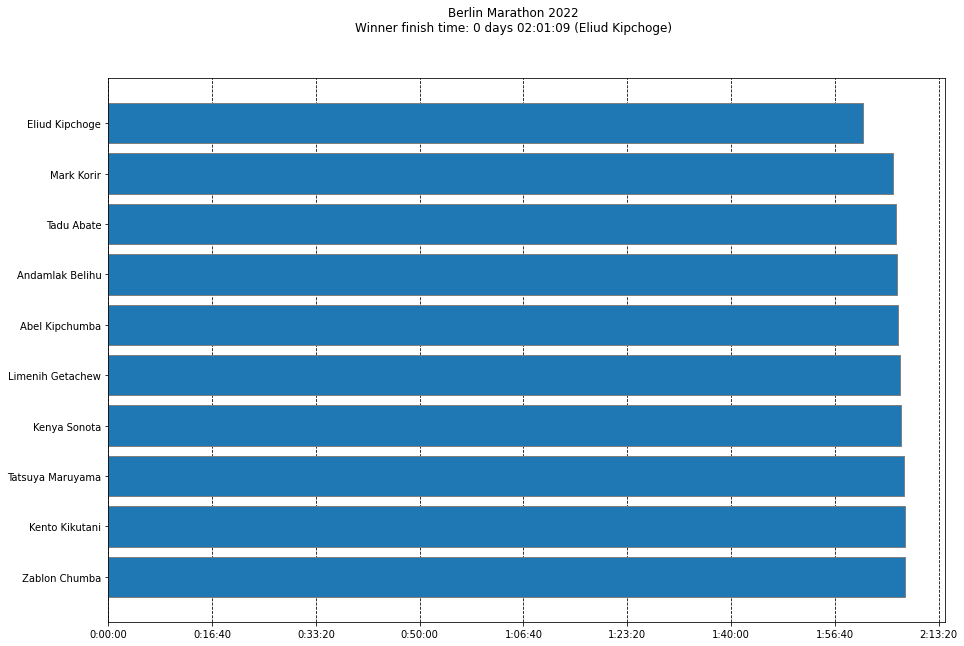

In [14]:
import matplotlib
import datetime


def timeTicks(x, pos):
    seconds = x / 10**9
    d = datetime.timedelta(seconds=seconds)
    return str(d)

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
ax.barh(male_top_10['fullname'], male_top_10['nettime'],
         edgecolor='grey')
ax.set_yticks(male_top_10['fullname']) 
ax.set_yticklabels(male_top_10['fullname'])

formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax.xaxis.set_major_formatter(formatter)


# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)


plt.suptitle(f"Berlin Marathon 2022\n" f"Winner finish time: {male_top_10.iloc[0]['nettime']} ({male_top_10.iloc[0]['fullname']})")

plt.show()


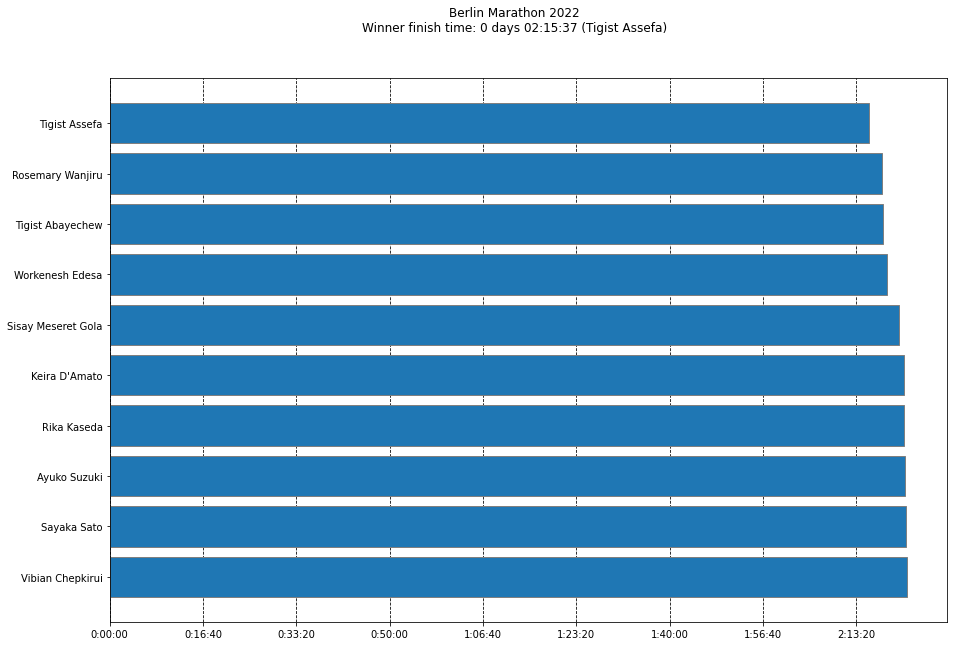

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
ax.barh(females_top_10['fullname'], females_top_10['nettime'],
         edgecolor='grey')
ax.set_yticks(females_top_10['fullname']) 
ax.set_yticklabels(females_top_10['fullname'])

formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax.xaxis.set_major_formatter(formatter)


# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)


plt.suptitle(f"Berlin Marathon 2022\n" f"Winner finish time: {females_top_10.iloc[0]['nettime']} ({females_top_10.iloc[0]['fullname']})")

plt.show()

Runpandas for some race results come with the splits for the partial distances of the race. We can fetch for any runner the splits using the method ```runpandas.acessors.splits.pick_athlete```.  So, if we need to have direct access to all splits from a specific runner, we will use the ```splits``` acesssor.

In [16]:
race_result.splits.pick_athlete(identifier='1')

,time,distance_meters,distance_miles
split,,,
0k,0 days 00:00:00,0,0.0000
5k,0 days 00:14:14,5000,3.1069
10k,0 days 00:28:23,10000,6.2137
15k,0 days 00:42:33,15000,9.3206
20k,0 days 00:56:45,20000,12.4274
half,0 days 00:59:51,21097,13.1091
25k,0 days 01:11:08,25000,15.5343
30k,0 days 01:25:40,30000,18.6411
35k,0 days 01:40:10,35000,21.7480


Now that we have access to all splits data, we can reshape the data and plot the finish time results with the splits for each mark presented. We will use the horizontal stacked bar charts.

First, let's fetch the top 10 male and female finishers from Berlin Marathon including their splits.

In [17]:
male_top_10 =  man_top_10[['firstname', 'lastname', 'country', '5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k', 'nettime']]
male_top_10['fullname'] = male_top_10['firstname'] + ' ' +  male_top_10['lastname'] + ' (' +  male_top_10['country'] + ')'
male_top_10

,firstname,lastname,country,5k,10k,15k,20k,half,25k,30k,35k,40k,nettime,fullname
0,Eliud,Kipchoge,KEN,0 days 00:14:14,0 days 00:28:23,0 days 00:42:33,0 days 00:56:45,0 days 00:59:51,0 days 01:11:08,0 days 01:25:40,0 days 01:40:10,0 days 01:54:53,0 days 02:01:09,Eliud Kipchoge (KEN)
1,Mark,Korir,KEN,0 days 00:14:22,0 days 00:28:56,0 days 00:43:35,0 days 00:58:14,0 days 01:01:26,0 days 01:13:07,0 days 01:28:06,0 days 01:43:25,0 days 01:59:05,0 days 02:05:58,Mark Korir (KEN)
2,Tadu,Abate,ETH,0 days 00:14:50,0 days 00:29:46,0 days 00:44:40,0 days 00:59:40,0 days 01:02:55,0 days 01:14:44,0 days 01:30:01,0 days 01:44:55,0 days 02:00:03,0 days 02:06:28,Tadu Abate (ETH)
3,Andamlak,Belihu,ETH,0 days 00:14:16,0 days 00:28:23,0 days 00:42:33,0 days 00:56:45,0 days 00:59:51,0 days 01:11:09,0 days 01:26:11,0 days 01:42:14,0 days 01:59:14,0 days 02:06:40,Andamlak Belihu (ETH)
4,Abel,Kipchumba,KEN,0 days 00:14:22,0 days 00:28:55,0 days 00:43:35,0 days 00:58:14,0 days 01:01:25,0 days 01:13:07,0 days 01:28:03,0 days 01:43:08,0 days 01:59:14,0 days 02:06:49,Abel Kipchumba (KEN)
5,Limenih,Getachew,ETH,0 days 00:14:49,0 days 00:29:46,0 days 00:44:40,0 days 00:59:42,0 days 01:02:56,0 days 01:14:45,0 days 01:30:00,0 days 01:45:06,0 days 02:00:22,0 days 02:07:07,Limenih Getachew (ETH)
6,Kenya,Sonota,JPN,0 days 00:14:49,0 days 00:29:46,0 days 00:44:38,0 days 00:59:39,0 days 01:02:55,0 days 01:14:45,0 days 01:30:01,0 days 01:45:06,0 days 02:00:30,0 days 02:07:14,Kenya Sonota (JPN)
7,Tatsuya,Maruyama,JPN,0 days 00:15:06,0 days 00:30:10,0 days 00:45:28,0 days 01:00:47,0 days 01:04:05,0 days 01:15:46,0 days 01:30:43,0 days 01:45:53,0 days 02:01:17,0 days 02:07:50,Tatsuya Maruyama (JPN)
8,Kento,Kikutani,JPN,0 days 00:14:50,0 days 00:29:47,0 days 00:44:39,0 days 00:59:40,0 days 01:02:56,0 days 01:14:45,0 days 01:30:02,0 days 01:45:19,0 days 02:01:10,0 days 02:07:56,Kento Kikutani (JPN)
9,Zablon,Chumba,KEN,0 days 00:14:49,0 days 00:29:45,0 days 00:44:38,0 days 00:59:39,0 days 01:02:54,0 days 01:14:45,0 days 01:30:00,0 days 01:45:05,0 days 02:00:49,0 days 02:08:01,Zablon Chumba (KEN)


In [18]:
females_top_10 =  female_top_10[['firstname', 'lastname', 'country',  '5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k', 'nettime']]
females_top_10['fullname'] = female_top_10['firstname'] + ' ' +  female_top_10['lastname'] + ' ' + ' (' +  female_top_10['country'] + ')'
females_top_10

,firstname,lastname,country,5k,10k,15k,20k,half,25k,30k,35k,40k,nettime,fullname
32,Tigist,Assefa,ETH,0 days 00:16:22,0 days 00:32:36,0 days 00:48:44,0 days 01:04:43,0 days 01:08:13,0 days 01:20:48,0 days 01:36:41,0 days 01:52:27,0 days 02:08:42,0 days 02:15:37,Tigist Assefa (ETH)
43,Rosemary,Wanjiru,KEN,0 days 00:16:23,0 days 00:32:38,0 days 00:48:47,0 days 01:04:47,0 days 01:08:17,0 days 01:20:54,0 days 01:36:57,0 days 01:53:16,0 days 02:10:10,0 days 02:18:00,Rosemary Wanjiru (KEN)
44,Tigist,Abayechew,ETH,0 days 00:16:23,0 days 00:32:38,0 days 00:48:46,0 days 01:04:44,0 days 01:08:14,0 days 01:20:49,0 days 01:36:41,0 days 01:52:46,0 days 02:10:15,0 days 02:18:03,Tigist Abayechew (ETH)
48,Workenesh,Edesa,ETH,0 days 00:16:22,0 days 00:32:37,0 days 00:48:44,0 days 01:04:44,0 days 01:08:13,0 days 01:20:48,0 days 01:37:01,0 days 01:53:57,0 days 02:11:15,0 days 02:18:51,Workenesh Edesa (ETH)
57,Sisay Meseret,Gola,ETH,0 days 00:16:23,0 days 00:32:37,0 days 00:48:44,0 days 01:04:43,0 days 01:08:13,0 days 01:20:49,0 days 01:36:42,0 days 01:53:30,0 days 02:12:29,0 days 02:20:58,Sisay Meseret Gola (ETH)
60,Keira,D'Amato,USA,0 days 00:16:25,0 days 00:32:43,0 days 00:49:11,0 days 01:05:50,0 days 01:09:27,0 days 01:22:36,0 days 01:39:35,0 days 01:57:06,0 days 02:14:28,0 days 02:21:48,Keira D'Amato (USA)
64,Rika,Kaseda,JPN,0 days 00:16:53,0 days 00:33:30,0 days 00:50:11,0 days 01:06:56,0 days 01:10:33,0 days 01:23:41,0 days 01:40:29,0 days 01:57:27,0 days 02:14:27,0 days 02:21:55,Rika Kaseda (JPN)
65,Ayuko,Suzuki,JPN,0 days 00:16:53,0 days 00:33:30,0 days 00:50:10,0 days 01:06:55,0 days 01:10:33,0 days 01:23:41,0 days 01:40:30,0 days 01:57:27,0 days 02:14:34,0 days 02:22:02,Ayuko Suzuki (JPN)
66,Sayaka,Sato,JPN,0 days 00:16:33,0 days 00:33:17,0 days 00:50:03,0 days 01:06:43,0 days 01:10:20,0 days 01:23:29,0 days 01:40:30,0 days 01:57:28,0 days 02:14:48,0 days 02:22:13,Sayaka Sato (JPN)
68,Vibian,Chepkirui,KEN,0 days 00:16:21,0 days 00:32:36,0 days 00:48:44,0 days 01:04:43,0 days 01:08:13,0 days 01:20:48,0 days 01:36:58,0 days 01:54:12,0 days 02:13:38,0 days 02:22:21,Vibian Chepkirui (KEN)


In [19]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

Now it is time for us to visualize the data! We start with defining the colors of the splits in a dictionary so we can access those later.

In [20]:
split_colors = {
    '5k': '#FF3333',
    '10k': '#FFF200',
    '15k': '#EBEBEB',
    '20k': '#39B54A',
    'half': '#00AEEF',
    '25k': '#8c564b',
    '30k': '#e377c2',
    '35k': '#7f7f7f',
    '40k': '#bcbd22',
    'nettime': '#17becf',
}

After that, it is time to (finally) generate the plot!


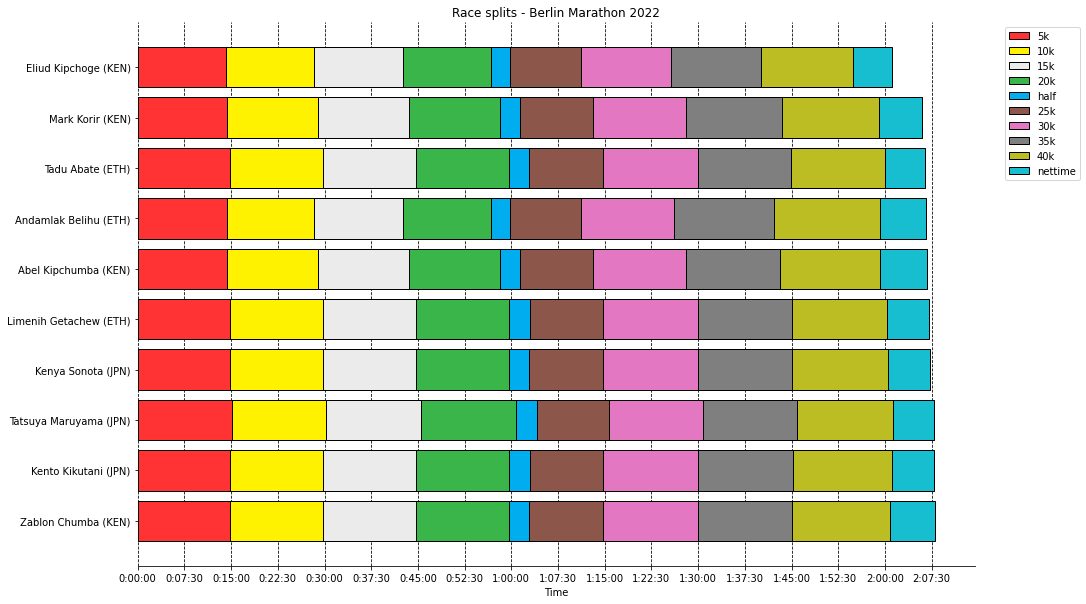

In [21]:


fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

SPLITS = ['5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k', 'nettime']

for _, finisher in male_top_10.iterrows():
    previous_split_end = pd.to_timedelta("0:00:00").total_seconds()
    for split in SPLITS :
        ax.barh(
            [finisher['fullname']],
            finisher[split].total_seconds() - previous_split_end,
            left=previous_split_end,
            color=split_colors[split],
            label = split,
            edgecolor = "black"
        )
        previous_split_end = finisher[split].total_seconds()

def timeTicks(x, pos):
    d = datetime.timedelta(seconds=x)
    return str(d)
formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(plt.MultipleLocator(15*30))

# Set title
plt.title(f'Race splits - Berlin Marathon 2022')

# Set x-label
plt.xlabel('Time')

# Invert y-axis
plt.gca().invert_yaxis()

# Remove frame from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

horiz_offset = 1.03
vert_offset = 1.
ax.legend(SPLITS, bbox_to_anchor=(horiz_offset, vert_offset))
plt.show()

We can see above that the Eliud Kipchoge, since the second split (10k) took the leadership with some minutes at front of the other runners.
Let's now plot the race splits for the top ten female finishers.

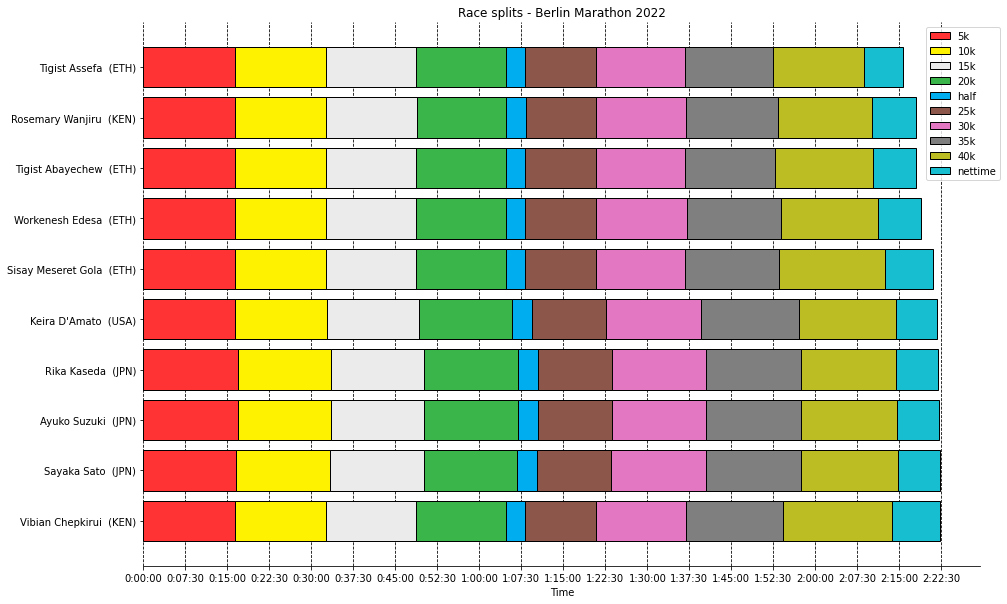

In [22]:


fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

SPLITS = ['5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k', 'nettime']

for _, finisher in females_top_10.iterrows():
    previous_split_end = pd.to_timedelta("0:00:00").total_seconds()
    for split in SPLITS :
        ax.barh(
            [finisher['fullname']],
            finisher[split].total_seconds() - previous_split_end,
            left=previous_split_end,
            color=split_colors[split],
            label = split,
            edgecolor = "black"
        )
        previous_split_end = finisher[split].total_seconds()

def timeTicks(x, pos):
    d = datetime.timedelta(seconds=x)
    return str(d)
formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(plt.MultipleLocator(15*30))

# Set title
plt.title(f'Race splits - Berlin Marathon 2022')

# Set x-label
plt.xlabel('Time')

# Invert y-axis
plt.gca().invert_yaxis()

# Remove frame from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

horiz_offset = 1.03
vert_offset = 1.
ax.legend(SPLITS, bbox_to_anchor=(horiz_offset, vert_offset))
plt.show()

Different from the female finishers, where the finish podium was more disputed. Tigist Assefa only took the leadership with relative difference from the split 40k (almost at the end of the race).

One of the curiosities about the race is to visualize the standing changes over the splits. To see if any runners lost their positions during the first or the second half of the race, or if any runners lost the podium during the final splits. Let's prepate the data for the plot, by calculating the runner's position at each split of the race.

We will create a rank table based on the split times for each runner. Pandas comes with a useful method for this task named `pandas.DataFrame.rank`.  We will compute for each split the standing position, so we can have a overall look at the changes during the race.


In [23]:
male_top_10_filtered = male_top_10.drop(['firstname', 'lastname', 'country'], axis=1)
ranked_male_top10 = male_top_10_filtered.set_index('fullname').rank(method='dense').reset_index()
ranked_male_top10

,fullname,5k,10k,15k,20k,half,25k,30k,35k,40k,nettime
0,Eliud Kipchoge (KEN),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Mark Korir (KEN),3.0,3.0,2.0,2.0,3.0,3.0,4.0,4.0,2.0,2.0
2,Tadu Abate (ETH),5.0,5.0,5.0,4.0,5.0,4.0,6.0,5.0,4.0,3.0
3,Andamlak Belihu (ETH),2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0
4,Abel Kipchumba (KEN),3.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0
5,Limenih Getachew (ETH),4.0,5.0,5.0,5.0,6.0,5.0,5.0,7.0,5.0,6.0
6,Kenya Sonota (JPN),4.0,5.0,3.0,3.0,5.0,5.0,6.0,7.0,6.0,7.0
7,Tatsuya Maruyama (JPN),6.0,7.0,6.0,6.0,7.0,6.0,8.0,9.0,9.0,8.0
8,Kento Kikutani (JPN),5.0,6.0,4.0,4.0,6.0,5.0,7.0,8.0,8.0,9.0
9,Zablon Chumba (KEN),4.0,4.0,3.0,3.0,4.0,5.0,5.0,6.0,7.0,10.0


Now, we’re melting the dataset based on the split. This will convert the dataset from wide to long, were multiple columns (in this case the split and the runner) will work as identifiers. The result of the melting looks like this:



In [24]:
berlin_male_top10_standings = pd.melt(ranked_male_top10, ['fullname'])
berlin_male_top10_standings

,fullname,variable,value
0,Eliud Kipchoge (KEN),5k,1.0
1,Mark Korir (KEN),5k,3.0
2,Tadu Abate (ETH),5k,5.0
3,Andamlak Belihu (ETH),5k,2.0
4,Abel Kipchumba (KEN),5k,3.0
...,...,...,...
95,Limenih Getachew (ETH),nettime,6.0
96,Kenya Sonota (JPN),nettime,7.0
97,Tatsuya Maruyama (JPN),nettime,8.0
98,Kento Kikutani (JPN),nettime,9.0


Now we have the data in the format we want it in, we can generate the final plot.


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

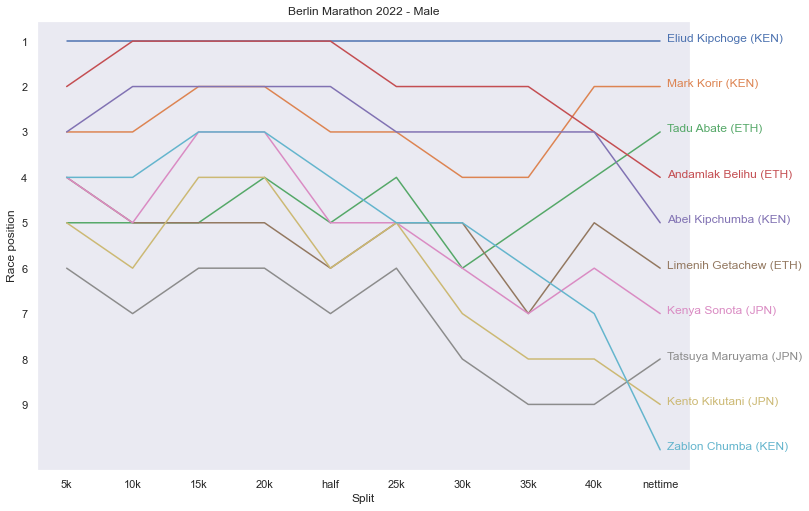

In [26]:
# Increase the size of the plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Initiate the plot
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title("Berlin Marathon 2022 - Male")

# Draw a line for every runner in the data by looping through all the standings
for runner in pd.unique(berlin_male_top10_standings['fullname']):
    sns.lineplot(
        x='variable', 
        y='value', 
        data=berlin_male_top10_standings.loc[berlin_male_top10_standings['fullname']==runner],
    )

# Invert Y-axis to have runner leader (#1) on top
ax.invert_yaxis()

# Set the values that appear on  y-axes
ax.set_yticks(range(1, 10))

# Set the labels of the axes
ax.set_xlabel("Split")
ax.set_ylabel("Race position")

# Disable the gridlines
ax.grid(False)


# Add the runner name to the lines
for line, name in zip(ax.lines, ranked_male_top10['fullname'].tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]

    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )

Amazing to see the performance of Eliud Kipchoge, always on the lead. Other runner that lost positions was Andamlak Belihu (ETH), who tried to follow Eliud but from the second half lost three positions.

Let's analyze the women's standing during the race. Let's perform the transformation on the female's dataset (ranking and melting methods).

In [27]:
females_top_10_filtered = females_top_10.drop(['firstname', 'lastname', 'country'], axis=1)
ranked_females_top10 = females_top_10_filtered.set_index('fullname').rank(method='dense').reset_index()
ranked_females_top10

,fullname,5k,10k,15k,20k,half,25k,30k,35k,40k,nettime
0,Tigist Assefa (ETH),2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Rosemary Wanjiru (KEN),3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0
2,Tigist Abayechew (ETH),3.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0
3,Workenesh Edesa (ETH),2.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,4.0,4.0
4,Sisay Meseret Gola (ETH),3.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,5.0
5,Keira D'Amato (USA),4.0,4.0,4.0,4.0,4.0,4.0,6.0,7.0,8.0,6.0
6,Rika Kaseda (JPN),6.0,6.0,7.0,7.0,6.0,6.0,7.0,8.0,7.0,7.0
7,Ayuko Suzuki (JPN),6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,9.0,8.0
8,Sayaka Sato (JPN),5.0,5.0,5.0,5.0,5.0,5.0,8.0,9.0,10.0,9.0
9,Vibian Chepkirui (KEN),1.0,1.0,1.0,1.0,1.0,1.0,4.0,6.0,6.0,10.0


In [28]:
berlin_female_top10_standings = pd.melt(ranked_females_top10, ['fullname'])
berlin_female_top10_standings

,fullname,variable,value
0,Tigist Assefa (ETH),5k,2.0
1,Rosemary Wanjiru (KEN),5k,3.0
2,Tigist Abayechew (ETH),5k,3.0
3,Workenesh Edesa (ETH),5k,2.0
4,Sisay Meseret Gola (ETH),5k,3.0
...,...,...,...
95,Keira D'Amato (USA),nettime,6.0
96,Rika Kaseda (JPN),nettime,7.0
97,Ayuko Suzuki (JPN),nettime,8.0
98,Sayaka Sato (JPN),nettime,9.0


Let's now plot the standings position through the race.

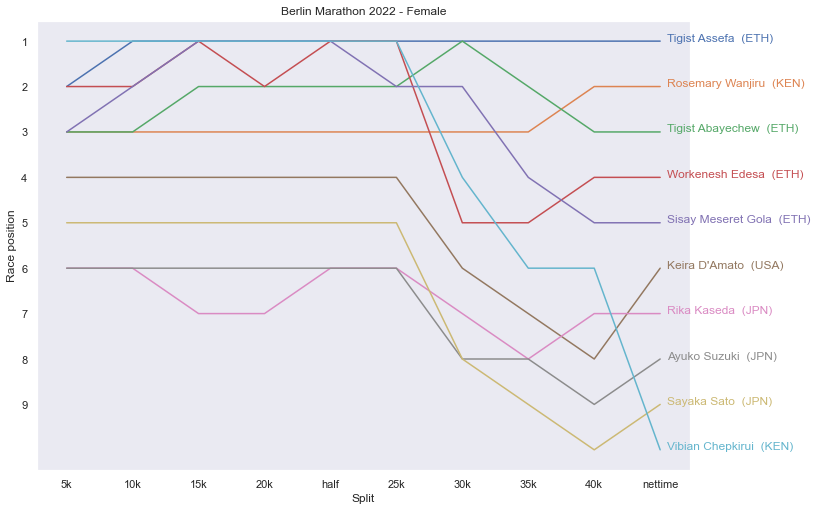

In [29]:
# Increase the size of the plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Initiate the plot
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title("Berlin Marathon 2022 - Female")

# Draw a line for every runner in the data by looping through all the standings
for runner in pd.unique(berlin_female_top10_standings['fullname']):
    sns.lineplot(
        x='variable', 
        y='value', 
        data=berlin_female_top10_standings.loc[berlin_female_top10_standings['fullname']==runner],
    )

# Invert Y-axis to have runner leader (#1) on top
ax.invert_yaxis()

# Set the values that appear on  y-axes
ax.set_yticks(range(1, 10))

# Set the labels of the axes
ax.set_xlabel("Split")
ax.set_ylabel("Race position")

# Disable the gridlines
ax.grid(False)


# Add the runner name to the lines
for line, name in zip(ax.lines, ranked_females_top10['fullname'].tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]

    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )

Tigist Assefa (ETH) showing a steadily high performance maintaning the leadership during all the race. It is interesting to see the that Vibian Chepkirui (KEN) tried to follow her until the split 25k and lost many position, finishing in 10th place. The same happened to Workensh Edesa (ETH) alternating the first and second positions until the second half of the race, which she lost three positions and finished on 4th place.

### Analyzing Eliud Kipchoge results

Eliud Kipchoge shattered his own world record on Berlin Marathon with a time of 02:01:09. Kipchoge's previous best in an official 42.2km race was 2:01:39 set on the same course in 2018. Eliud also made history in 2019 when he became the first man to run a marathon in under two hours at INEOS 1:59 Challenge, in Vienna, Austria.  Based on these amazing finishing times, we would like to compare all the split datas from these races to see how Eliud performed during the race compared to his previous world record in 2018 and INEOS 1:59 Challenge, so we can see what he need to perform this mark in a marathon again.


First we need to collect his available splits in 2022 and 2018 Berlin Marathons and the INEOS 1:49 Challenge.

In [30]:
#collecting the splits from 2022 from the previous berlin dataset
eliud_2022_berlin_result = race_result.splits.pick_athlete(identifier='1')
eliud_2022_berlin_result.rename(columns={'time': 'time_2022'}, inplace=True)
eliud_2022_berlin_result

,time_2022,distance_meters,distance_miles
split,,,
0k,0 days 00:00:00,0,0.0000
5k,0 days 00:14:14,5000,3.1069
10k,0 days 00:28:23,10000,6.2137
15k,0 days 00:42:33,15000,9.3206
20k,0 days 00:56:45,20000,12.4274
half,0 days 00:59:51,21097,13.1091
25k,0 days 01:11:08,25000,15.5343
30k,0 days 01:25:40,30000,18.6411
35k,0 days 01:40:10,35000,21.7480


In [31]:
#We created the splits pandas Series from the 2018 Berlin Marathon for Eliud Kipchoge manually.  Source: Berlin Marathon Result Archive
eliud_2018_berlin_result = pd.Series(["0:00:00", "00:14:24", "00:29:01", "00:43:38", "00:57:56", "01:01:06", "01:12:24", "01:26:45", "01:41:03", "01:55:32", "02:01:39"], index=['0k', '5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k', 'nettime'], name='time_2018')
eliud_2018_berlin_result = pd.to_timedelta(eliud_2018_berlin_result)

eliud_2018_berlin_result

0k        0 days 00:00:00
5k        0 days 00:14:24
10k       0 days 00:29:01
15k       0 days 00:43:38
20k       0 days 00:57:56
half      0 days 01:01:06
25k       0 days 01:12:24
30k       0 days 01:26:45
35k       0 days 01:41:03
40k       0 days 01:55:32
nettime   0 days 02:01:39
Name: time_2018, dtype: timedelta64[ns]

In [32]:
#We created the splits pandas Series from the 2019 INEOS 159 Challenge for Eliud Kipchoge manually. Source: wikipedia
eliud_2019_ineos_159_result = pd.Series(["0:00:00", "00:14:10", "00:28:20", "00:42:34", "00:56:47", "0:59:37", "01:10:59", "01:25:11", "01:39:23", "01:53:36", "01:59:40"], index=['0k', '5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k', 'nettime'], name='time_ineos_159')
eliud_2019_ineos_159_result = pd.to_timedelta(eliud_2019_ineos_159_result)

eliud_2019_ineos_159_result

0k        0 days 00:00:00
5k        0 days 00:14:10
10k       0 days 00:28:20
15k       0 days 00:42:34
20k       0 days 00:56:47
half      0 days 00:59:37
25k       0 days 01:10:59
30k       0 days 01:25:11
35k       0 days 01:39:23
40k       0 days 01:53:36
nettime   0 days 01:59:40
Name: time_ineos_159, dtype: timedelta64[ns]

In [33]:
#Merging all series into a single dataframe containing all splits from 2018, Ineos 159 and 2022 race results.
eliud_race_results = eliud_2022_berlin_result.merge(eliud_2019_ineos_159_result.to_frame(), left_index=True, right_index=True).merge(eliud_2018_berlin_result.to_frame(), left_index=True, right_index=True)
eliud_race_results


,time_2022,distance_meters,distance_miles,time_ineos_159,time_2018
0k,0 days 00:00:00,0,0.0000,0 days 00:00:00,0 days 00:00:00
5k,0 days 00:14:14,5000,3.1069,0 days 00:14:10,0 days 00:14:24
10k,0 days 00:28:23,10000,6.2137,0 days 00:28:20,0 days 00:29:01
15k,0 days 00:42:33,15000,9.3206,0 days 00:42:34,0 days 00:43:38
20k,0 days 00:56:45,20000,12.4274,0 days 00:56:47,0 days 00:57:56
half,0 days 00:59:51,21097,13.1091,0 days 00:59:37,0 days 01:01:06
25k,0 days 01:11:08,25000,15.5343,0 days 01:10:59,0 days 01:12:24
30k,0 days 01:25:40,30000,18.6411,0 days 01:25:11,0 days 01:26:45
35k,0 days 01:40:10,35000,21.7480,0 days 01:39:23,0 days 01:41:03
40k,0 days 01:54:53,40000,24.8548,0 days 01:53:36,0 days 01:55:32


Let’s now replay these four three WRs in the same (virtual) race, to get a better sense of how Eliud Kipchoge has performed by comparing their pacing and timing information.

In [37]:
#let's compute the timing difference for all the splits againts the INEOS 159 WR record (best result from Eliud)
eliud_race_results['diff_2022_ineos'] = eliud_race_results['time_2022'].dt.total_seconds() - eliud_race_results['time_ineos_159'].dt.total_seconds()
eliud_race_results['diff_2018_ineos'] = eliud_race_results['time_2018'].dt.total_seconds() - eliud_race_results['time_ineos_159'].dt.total_seconds()
eliud_race_results['ineos_159_time_ref'] = 0.0 #all values 0 as reference
eliud_race_results['diff_2022_2018'] = eliud_race_results['time_2022'].dt.total_seconds() - eliud_race_results['time_2018'].dt.total_seconds()
eliud_race_results

,time_2022,distance_meters,distance_miles,time_ineos_159,time_2018,diff_2022_ineos,diff_2018_ineos,ineos_159_time_ref,diff_2022_2018
0k,0 days 00:00:00,0,0.0000,0 days 00:00:00,0 days 00:00:00,0.0,0.0,0.0,0.0
5k,0 days 00:14:14,5000,3.1069,0 days 00:14:10,0 days 00:14:24,4.0,14.0,0.0,-10.0
10k,0 days 00:28:23,10000,6.2137,0 days 00:28:20,0 days 00:29:01,3.0,41.0,0.0,-38.0
15k,0 days 00:42:33,15000,9.3206,0 days 00:42:34,0 days 00:43:38,-1.0,64.0,0.0,-65.0
20k,0 days 00:56:45,20000,12.4274,0 days 00:56:47,0 days 00:57:56,-2.0,69.0,0.0,-71.0
half,0 days 00:59:51,21097,13.1091,0 days 00:59:37,0 days 01:01:06,14.0,89.0,0.0,-75.0
25k,0 days 01:11:08,25000,15.5343,0 days 01:10:59,0 days 01:12:24,9.0,85.0,0.0,-76.0
30k,0 days 01:25:40,30000,18.6411,0 days 01:25:11,0 days 01:26:45,29.0,94.0,0.0,-65.0
35k,0 days 01:40:10,35000,21.7480,0 days 01:39:23,0 days 01:41:03,47.0,100.0,0.0,-53.0
40k,0 days 01:54:53,40000,24.8548,0 days 01:53:36,0 days 01:55:32,77.0,116.0,0.0,-39.0


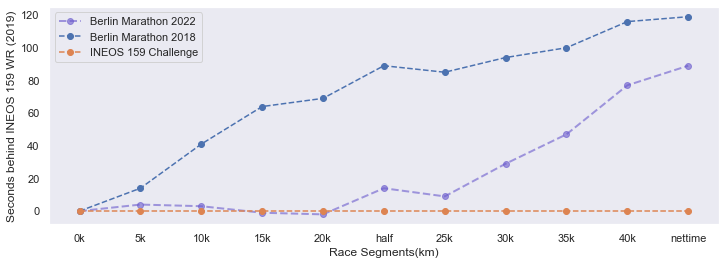

In [36]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(eliud_race_results.index, eliud_race_results['diff_2022_ineos'], color="Slateblue",
         alpha=0.6, linewidth=2,  linestyle='dashed', marker='o', label='Berlin Marathon 2022')
ax1.plot(eliud_race_results.index,  eliud_race_results['diff_2018_ineos'], marker='o', linestyle='dashed', label='Berlin Marathon 2018' )
ax1.plot(eliud_race_results.index,  eliud_race_results['ineos_159_time_ref'], marker='o', linestyle='dashed', label='INEOS 159 Challenge' )
ax1.set_xlabel('Race Segments(km)', size=12)
ax1.set_ylabel('Seconds behind INEOS 159 WR (2019)', size=12)
ax1.grid()
ax1.legend(loc=0)
plt.show()

Using Kipchoge’s INEO Challenge run as the baseline, Figure above shows the number of seconds each WR run was behind Kipchoge best result at INEOS 159 challenge at the end of each race segment (and at the finish-line) in this virtual race. Kipchoge 2022's result showed an amazing start where by 15k-20km marks , he has ahead from his best result from INEOS for about two seconds, but gradually extends his difference time after the half mark. We can also see that the 2022 vss 2018 previous record, what an amazing difference, finishing with 30 seconds ahead. By any objective measure Kipchoge’s Berlin world-record 2022 race was nothing short of stunning. He obliterated his own previous 2018 record.



In [39]:
eliud_race_results

,time_2022,distance_meters,distance_miles,time_ineos_159,time_2018,diff_2022_ineos,diff_2018_ineos,ineos_159_time_ref,diff_2022_2018
0k,0 days 00:00:00,0,0.0000,0 days 00:00:00,0 days 00:00:00,0.0,0.0,0.0,0.0
5k,0 days 00:14:14,5000,3.1069,0 days 00:14:10,0 days 00:14:24,4.0,14.0,0.0,-10.0
10k,0 days 00:28:23,10000,6.2137,0 days 00:28:20,0 days 00:29:01,3.0,41.0,0.0,-38.0
15k,0 days 00:42:33,15000,9.3206,0 days 00:42:34,0 days 00:43:38,-1.0,64.0,0.0,-65.0
20k,0 days 00:56:45,20000,12.4274,0 days 00:56:47,0 days 00:57:56,-2.0,69.0,0.0,-71.0
half,0 days 00:59:51,21097,13.1091,0 days 00:59:37,0 days 01:01:06,14.0,89.0,0.0,-75.0
25k,0 days 01:11:08,25000,15.5343,0 days 01:10:59,0 days 01:12:24,9.0,85.0,0.0,-76.0
30k,0 days 01:25:40,30000,18.6411,0 days 01:25:11,0 days 01:26:45,29.0,94.0,0.0,-65.0
35k,0 days 01:40:10,35000,21.7480,0 days 01:39:23,0 days 01:41:03,47.0,100.0,0.0,-53.0
40k,0 days 01:54:53,40000,24.8548,0 days 01:53:36,0 days 01:55:32,77.0,116.0,0.0,-39.0


In [38]:
plt.style.use('ggplot')


The figure above shows the pacing (in decimal mins/km) for all 3 WRs across each of the segments of the race (5 km, 10 km, …, 40km), and the final 2.195km segment. In each case the dashed line reflects the average pace for the runner in question. 

For those not familiar with this type of chart, we call it radar chart, also called as Spider chart or Web chart. It is a graphical method used for comparing multiple quantitative variables. It is a two dimensional polar visualization.



Based on the timing data released by the Berlin Marathon, Kipchoge ran the first 5 km in 14 mins, 24 seconds, or anout 2:53 mins/km, and he ran between 2:52 mins/km and 2:56 mins/km until the final 2.195 km stretch, which he dispatched at just under 2:48 mins/km pace, faster than any of last three male WRs managed in Berlin.


### Conclusions

### 